In [188]:
import pandas as pd
import numpy as np
import seaborn as sn
import pandas_profiling

In [189]:
data=pd.read_csv("C:/Users/Dell/Desktop/Dataset.csv")
data["no_of_trainings"].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [190]:
data["education"]=data["education"].replace(np.NaN,"Bachelor's")
data["previous_year_rating"]=data["previous_year_rating"].replace(np.NaN,3.0)
data["previous_year_rating"].value_counts()

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [191]:
def handle_non_numerical_data(data):
    columns = data.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if data[column].dtype != np.int64 and data[column].dtype != np.float64:
            column_contents = data[column].values.tolist()
            unique_elements = set(column_contents)
            x = 1
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            data[column] = list(map(convert_to_int, data[column]))

    return data

In [192]:
data=handle_non_numerical_data(data)

In [193]:
data.corr()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,0.007302,-0.001557,-0.000573,0.001542,0.005960,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
department,0.007302,1.000000,-0.052348,-0.066394,0.070758,-0.008433,0.015733,-0.011103,-0.097062,-0.005144,-0.054443,0.001912,-0.123118,-0.004501
region,-0.001557,-0.052348,1.000000,0.024479,-0.060197,-0.007730,-0.066017,-0.095611,0.007229,-0.057024,0.007057,0.001888,-0.033015,0.000289
education,-0.000573,-0.066394,0.024479,1.000000,-0.035418,0.001177,0.028699,-0.244200,-0.023985,-0.168225,-0.015525,0.003006,-0.034936,-0.026244
gender,0.001542,0.070758,-0.060197,-0.035418,1.000000,-0.006567,-0.084501,0.016293,0.024024,0.019675,0.037400,-0.002381,0.024494,0.011109
recruitment_channel,0.005960,-0.008433,-0.007730,0.001177,-0.006567,1.000000,-0.010405,-0.011400,0.005731,-0.002887,-0.000297,-0.005510,-0.002416,0.002229
no_of_trainings,-0.005121,0.015733,-0.066017,0.028699,-0.084501,-0.010405,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.011103,-0.095611,-0.244200,0.016293,-0.011400,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.097062,0.007229,-0.023985,0.024024,0.005731,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.005144,-0.057024,-0.168225,0.019675,-0.002887,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670


In [10]:
pandas_profiling.ProfileReport(data)

Number of variables,14
Number of observations,54808
Total Missing (%),0.0%
Total size in memory,5.9 MiB
Average record size in memory,112.0 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [194]:
data.drop(["employee_id","region","department","recruitment_channel"],inplace=True,axis=1)

In [195]:
data.columns

Index(['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [196]:
X=data[['education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score']]


In [197]:
Y=data["is_promoted"]

In [198]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3)

In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [204]:
linear=KNeighborsClassifier(n_neighbors=7)

In [205]:
linear.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [206]:
prediction=linear.predict(X_test)

In [207]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.9175332968436417

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     14987
          1       0.73      0.11      0.19      1456

avg / total       0.90      0.92      0.89     16443



FINDING THE BEST N_NEIGBHOR VALUE 

In [105]:
l=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi=knn.predict(X_test)
    l.append(np.mean(y_test !=predi))

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

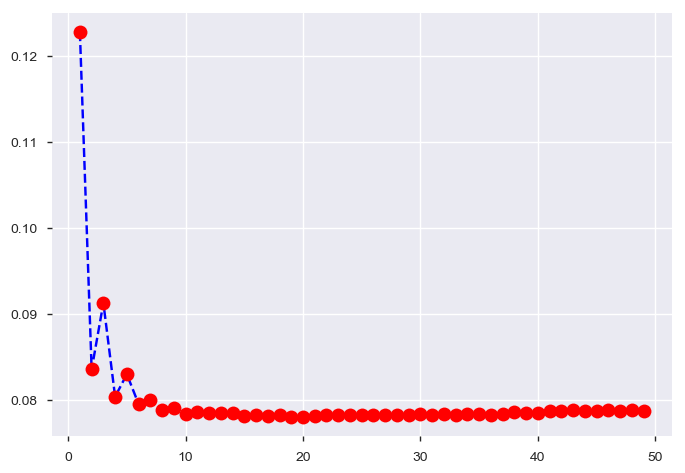

In [107]:
plt.plot(range(1,50),l,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

In [180]:
gradient=GradientBoostingClassifier(n_estimators=95)

In [181]:
gradient.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=95,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [182]:
prediction111=gradient.predict(X_test)

In [183]:
accuracy_score(y_test,prediction111)

0.9250136836343733

In [133]:
l=[]
for i in range(1,100):
    k1=GradientBoostingClassifier(n_estimators=i)
    k1.fit(X_train,y_train)
    predi111=k1.predict(X_test)
    l.append(np.mean(y_test !=predi111))

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

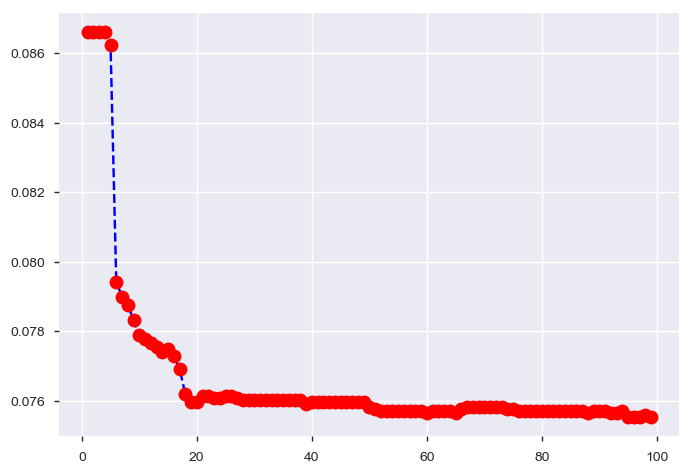

In [139]:
plt.plot(range(1,100),l,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10,)

In [185]:
from sklearn.metrics import classification_report


In [187]:
print(classification_report(y_test,prediction111))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     15036
          1       0.84      0.15      0.26      1407

avg / total       0.92      0.93      0.90     16443

